In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

In [144]:
math = pd.read_csv('stud_math.xls')

In [145]:
display(math.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [146]:
math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='school', ylabel='count'>

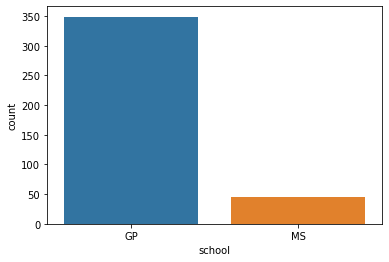

In [147]:
display(pd.DataFrame(math.school.value_counts()))
math.loc[:, ['school']].info()
sns.countplot(math.school)

In [148]:
math.drop(['school'], inplace = True, axis = 1) # значения в колоке Школа не имеют статистического значения, поэтому этот столбец можно удалить

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

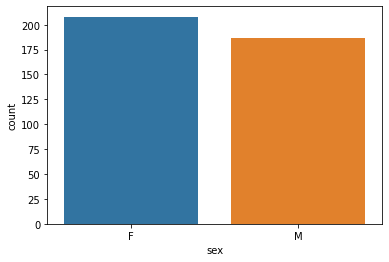

In [149]:
display(pd.DataFrame(math.sex.value_counts()))
math.loc[:, ['sex']].info()
sns.countplot(math.sex)

Согласно графику, мы видим, что девушек в данном исследовании больше, чем представителей мужского пола

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

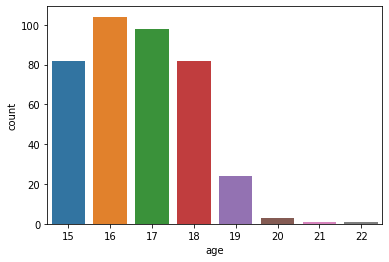

In [150]:
display(pd.DataFrame(math.age.value_counts()))
math.loc[:, ['age']].info()
sns.countplot(math.age)

Исходя из графика можно сделать вывод, что основа исследований - учащиеся в возрасте от 15 до 19 лет.

In [151]:
def nan_to_mode(obj_col): # функция для заполнения пустых значений
    mode = obj_col.mode()
    return obj_col.fillna(mode[0], inplace=True)

,address
U,312
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='address', ylabel='count'>

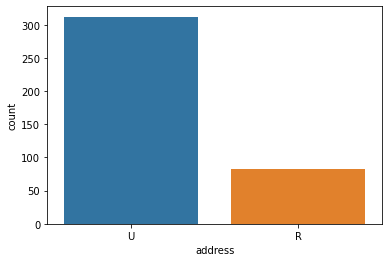

In [152]:
nan_to_mode(math.address) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math.address.value_counts()))
math.loc[:, ['address']].info()
sns.countplot(math.address)

73% учащихся живут в городе

,famsize
GT3,288
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='famsize', ylabel='count'>

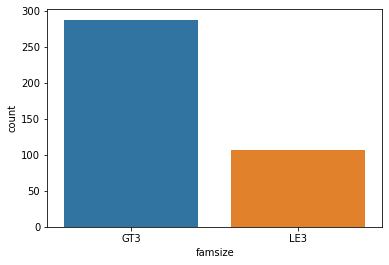

In [153]:
nan_to_mode(math.famsize) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math.famsize.value_counts()))
math.loc[:, ['famsize']].info()
sns.countplot(math.famsize)

Согласно графику 73% исследуемых имеют братьев/сестер.

,Pstatus
T,359
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pstatus', ylabel='count'>

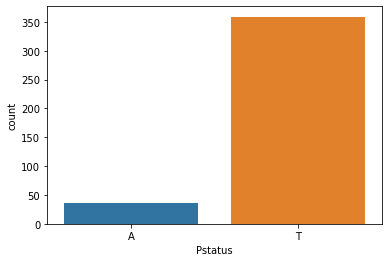

In [154]:
nan_to_mode(math.Pstatus) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math.Pstatus.value_counts()))
math.loc[:, ['Pstatus']].info()
sns.countplot(math.Pstatus)

91% исследуемых живут в в семьях, в которых родители живут вместе

In [155]:
def nan_to_med(num_col): # функция для заполнения пустых значений
    median = num_col.median(skipna = True)
    return num_col.fillna(median, inplace=True)

,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Medu', ylabel='count'>

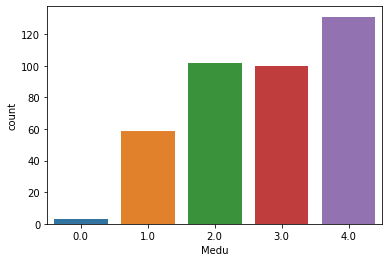

In [156]:
nan_to_med(math.Medu) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math.Medu.value_counts()))
math.loc[:, ['Medu']].info()
sns.countplot(math.Medu)

In [157]:
nan_to_med(math.Fedu) # вызываем функцию для заполнения пропусков
pd.DataFrame(math['Fedu'].value_counts())

,Fedu
2.0,130
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


In [158]:
math.Fedu= math.Fedu.replace(40,4) # заменим 40 на 4, т.к. 40 - некорректное значение для этой колонки

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fedu', ylabel='count'>

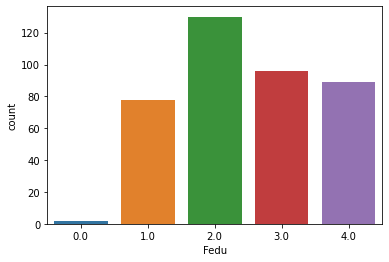

In [159]:
nan_to_med(math.Fedu) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math.Fedu.value_counts()))
math.loc[:, ['Fedu']].info()
sns.countplot(math.Fedu)

33% матерей окончили высшее учебное заведение, а 33% отцов закончили только среднюю школу

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mjob', ylabel='count'>

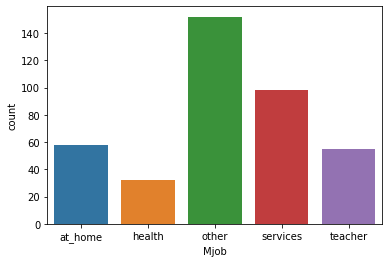

In [160]:
nan_to_mode(math.Mjob) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['Mjob'].value_counts()))
math.loc[:, ['Mjob']].info()
sns.countplot(math.Mjob)

,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fjob', ylabel='count'>

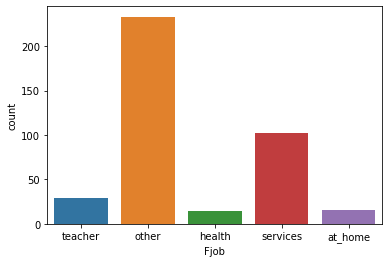

In [161]:
nan_to_mode(math.Fjob) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['Fjob'].value_counts()))
math.loc[:, ['Fjob']].info()
sns.countplot(math.Fjob)

38% матерей и 59% отцов заняты отличной от 'teacher', 'health', 'services', 'at_home' деятельностью

,reason
course,154
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reason', ylabel='count'>

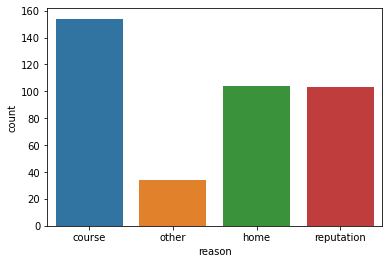

In [162]:
nan_to_mode(math.reason) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['reason'].value_counts()))
math.loc[:, ['reason']].info()
sns.countplot(math.reason)

39% выбрали школу благодаря учебной программе

,guardian
mother,281
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='guardian', ylabel='count'>

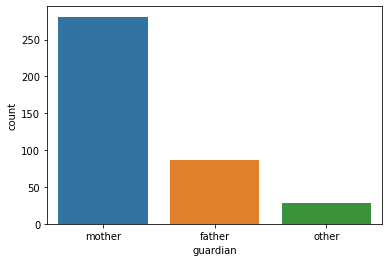

In [163]:
nan_to_mode(math.guardian) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['guardian'].value_counts()))
math.loc[:, ['guardian']].info()
sns.countplot(math.guardian)

В 71% случаев мать является опекуном

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='traveltime', ylabel='count'>

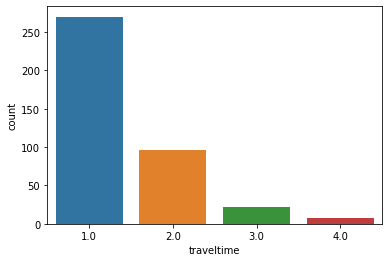

In [164]:
nan_to_med(math.traveltime) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['traveltime'].value_counts()))
math.loc[:, ['traveltime']].info()
sns.countplot(math.traveltime)

68% учащихся тратят на дорогу до школы менее 15 минут.

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='studytime', ylabel='count'>

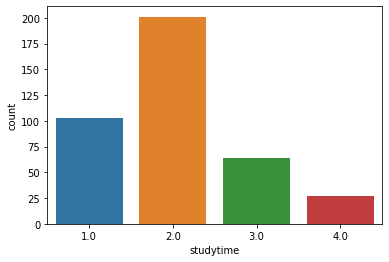

In [165]:
nan_to_med(math.studytime) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['studytime'].value_counts()))
math.loc[:, ['studytime']].info()
sns.countplot(math.studytime)

Половина учащихся 2-5 часов в неделю посвящает дополнительному обучению.

,failures
0.0,315
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='failures', ylabel='count'>

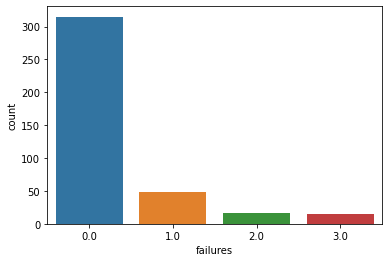

In [166]:
nan_to_med(math.failures) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['failures'].value_counts()))
math.loc[:, ['failures']].info()
sns.countplot(math.failures)

81% учащихся либо не имеют неудач, либо количество их неудач выше 3 - не очень информативная оценка.

,schoolsup
no,344
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='schoolsup', ylabel='count'>

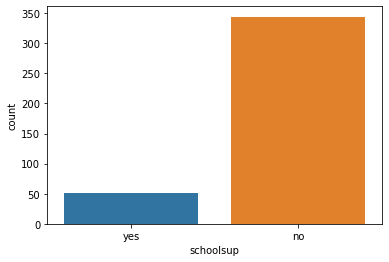

In [167]:
nan_to_mode(math.schoolsup) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['schoolsup'].value_counts()))
math.loc[:, ['schoolsup']].info()
sns.countplot(math.schoolsup)

87% учащихся не получают дополнительной образовательной поддержки

,famsup
yes,258
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='famsup', ylabel='count'>

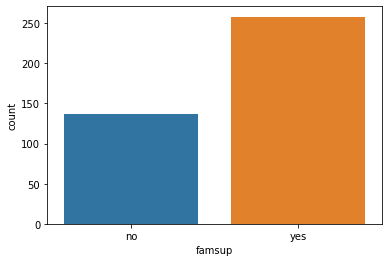

In [168]:
nan_to_mode(math.famsup) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['famsup'].value_counts()))
math.loc[:, ['famsup']].info()
sns.countplot(math.famsup)

65% учащихся получают дома дополнительную помощь в обучении

,paid
no,240
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='paid', ylabel='count'>

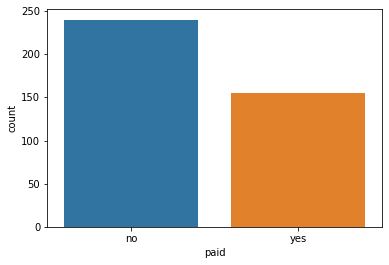

In [169]:
nan_to_mode(math.paid) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['paid'].value_counts()))
math.loc[:, ['paid']].info()
sns.countplot(math.paid)

61% учащихся не ходит на дополнительные платные занятия по математике

,activities
yes,209
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='activities', ylabel='count'>

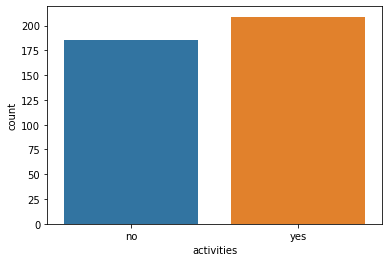

In [170]:
nan_to_mode(math.activities) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['activities'].value_counts()))
math.loc[:, ['activities']].info()
sns.countplot(math.activities)

53% учащихся посещают дополнительные внеучебные занятия

,nursery
yes,316
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nursery', ylabel='count'>

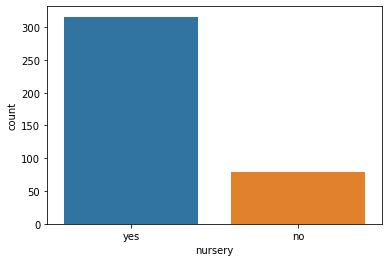

In [171]:
nan_to_mode(math.nursery) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['nursery'].value_counts()))
math.loc[:, ['nursery']].info()
sns.countplot(math.nursery)

80% посещали детский сад

In [172]:
math.drop(['studytime, granular'], inplace = True, axis = 1) # удалим этот столбец, т.к. он не имеет никакого статистического значения

,higher
yes,376
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='higher', ylabel='count'>

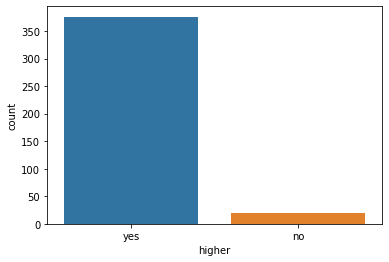

In [173]:
nan_to_mode(math.higher) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['higher'].value_counts()))
math.loc[:, ['higher']].info()
sns.countplot(math.higher)

95% опрошенных хотят получить высшее образование

,internet
yes,339
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='internet', ylabel='count'>

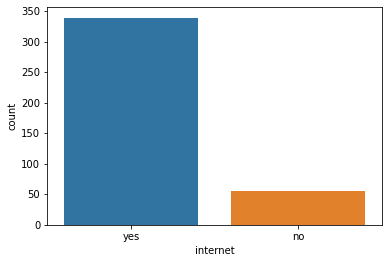

In [174]:
nan_to_mode(math.internet) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['internet'].value_counts()))
math.loc[:, ['internet']].info()
sns.countplot(math.internet)

У 86% учащихся есть дома интернет

,romantic
no,271
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='romantic', ylabel='count'>

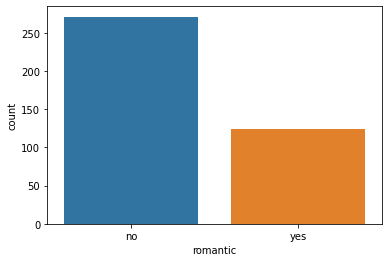

In [175]:
nan_to_mode(math.romantic) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['romantic'].value_counts()))
math.loc[:, ['romantic']].info()
sns.countplot(math.romantic)

69% учащихся состоят в романтических отношениях

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='famrel', ylabel='count'>

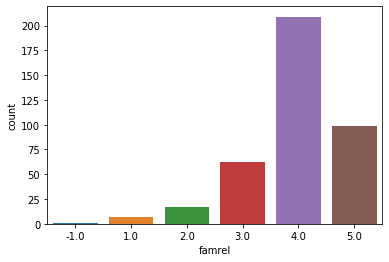

In [176]:
nan_to_med(math.famrel) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['famrel'].value_counts()))
math.loc[:, ['famrel']].info()
sns.countplot(math.famrel)

In [177]:
math.famrel = math.famrel.replace(-1,1) # заменим значение на кооректное (соответствующее диапазону значений)

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='famrel', ylabel='count'>

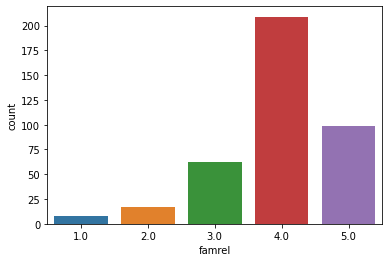

In [178]:
display(pd.DataFrame(math['famrel'].value_counts()))
math.loc[:, ['famrel']].info()
sns.countplot(math.famrel)

In [179]:
У 53% учащихся отношения в семье хорошие

SyntaxError: invalid syntax (<ipython-input-179-5edd58cd0283>, line 1)

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='freetime', ylabel='count'>

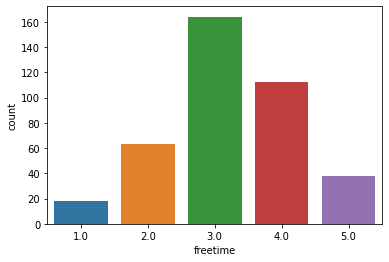

In [180]:
nan_to_med(math.freetime) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['freetime'].value_counts()))
math.loc[:, ['freetime']].info()
sns.countplot(math.freetime)

У 86% учащихся есть свободное время после школы

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='goout', ylabel='count'>

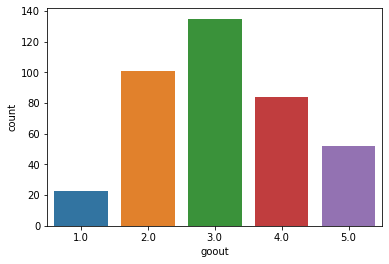

In [181]:
nan_to_med(math.goout) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['goout'].value_counts()))
math.loc[:, ['goout']].info()
sns.countplot(math.goout)

67% учащихся проводят время с друзьями (больше, чем мало)

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='health', ylabel='count'>

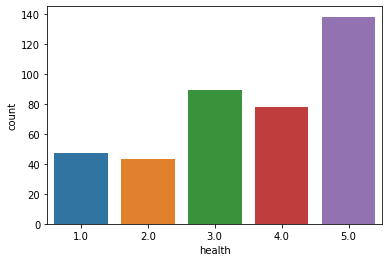

In [182]:
nan_to_med(math.health) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['health'].value_counts()))
math.loc[:, ['health']].info()
sns.countplot(math.health)

35% учащихся имеют очень хорошее состояние здоровья

In [183]:
nan_to_med(math.absences) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['absences'].value_counts()))
math.loc[:, ['absences']].info()

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

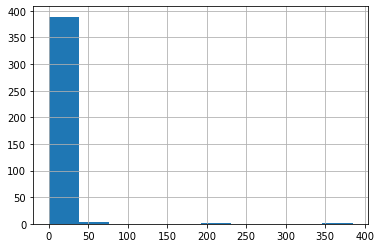

In [184]:
math.absences.hist()
math.absences.describe()

Исходя из графика, данные содержат выбросы

Перцентиль 25: 0.0, Перцентиль 75: 8.0, IQR: 8.0,  Выбросы: [-12.0, 20.0].


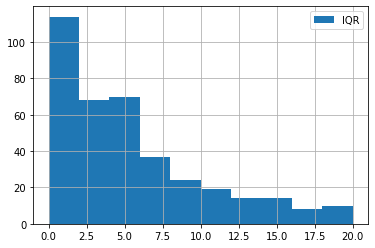

In [185]:
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
p25 = math.absences.quantile(0.25)
p75 = math.absences.quantile(0.75)
print('Перцентиль 25: {},'.format(p25), 'Перцентиль 75: {},'.format(p75), "IQR: {}, ".format(IQR), "Выбросы: [{f}, {l}].".format(f=p25 - 1.5*IQR, l=p75 + 1.5*IQR))
 
math.absences.loc[math.absences.between(p25 - 1.5*IQR, p75 + 1.5*IQR)].hist(bins = 10, range = (0, 20), label = 'IQR')
 
plt.legend();

In [186]:
math = math.loc[math.absences.between(p25 - 1.5*IQR, p75 + 1.5*IQR)]

In [187]:
nan_to_med(math.score) # вызываем функцию для заполнения пропусков
display(pd.DataFrame(math['score'].value_counts()))
math.loc[:, ['score']].info()

,score
50.0,54
55.0,48
0.0,37
75.0,33
60.0,31
65.0,30
40.0,28
70.0,27
45.0,23
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   378 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB


count    378.000000
mean      52.275132
std       22.890779
min        0.000000
25%       41.250000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

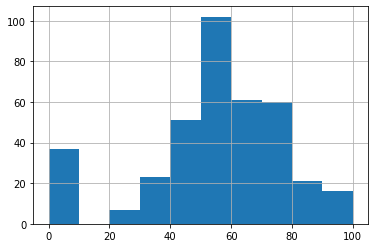

In [188]:
math.score.hist()
math.score.describe()

Исходя из графика, данные содержат выбросы

Перцентиль 25: 41.25, Перцентиль 75: 70.0, IQR: 28.75,  Выбросы: [-1.875, 113.125].


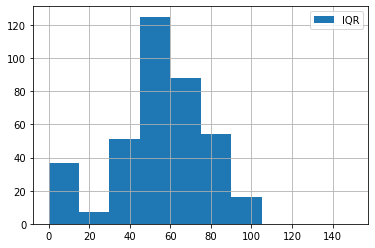

In [189]:
IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
pr25 = math.score.quantile(0.25)
pr75 = math.score.quantile(0.75)
print('Перцентиль 25: {},'.format(pr25), 'Перцентиль 75: {},'.format(pr75), "IQR: {}, "
      .format(IQR), "Выбросы: [{f}, {l}].".format(f=pr25 - 1.5*IQR, l=pr75 + 1.5*IQR))
 
math.score.loc[math.score.between(pr25 - 1.5*IQR, pr75 + 1.5*IQR)].hist(bins = 10, range = (0, 150), label = 'IQR')
 
plt.legend();

In [190]:
math = math.loc[math.score.between(pr25 - 1.5*IQR, pr75 + 1.5*IQR)]

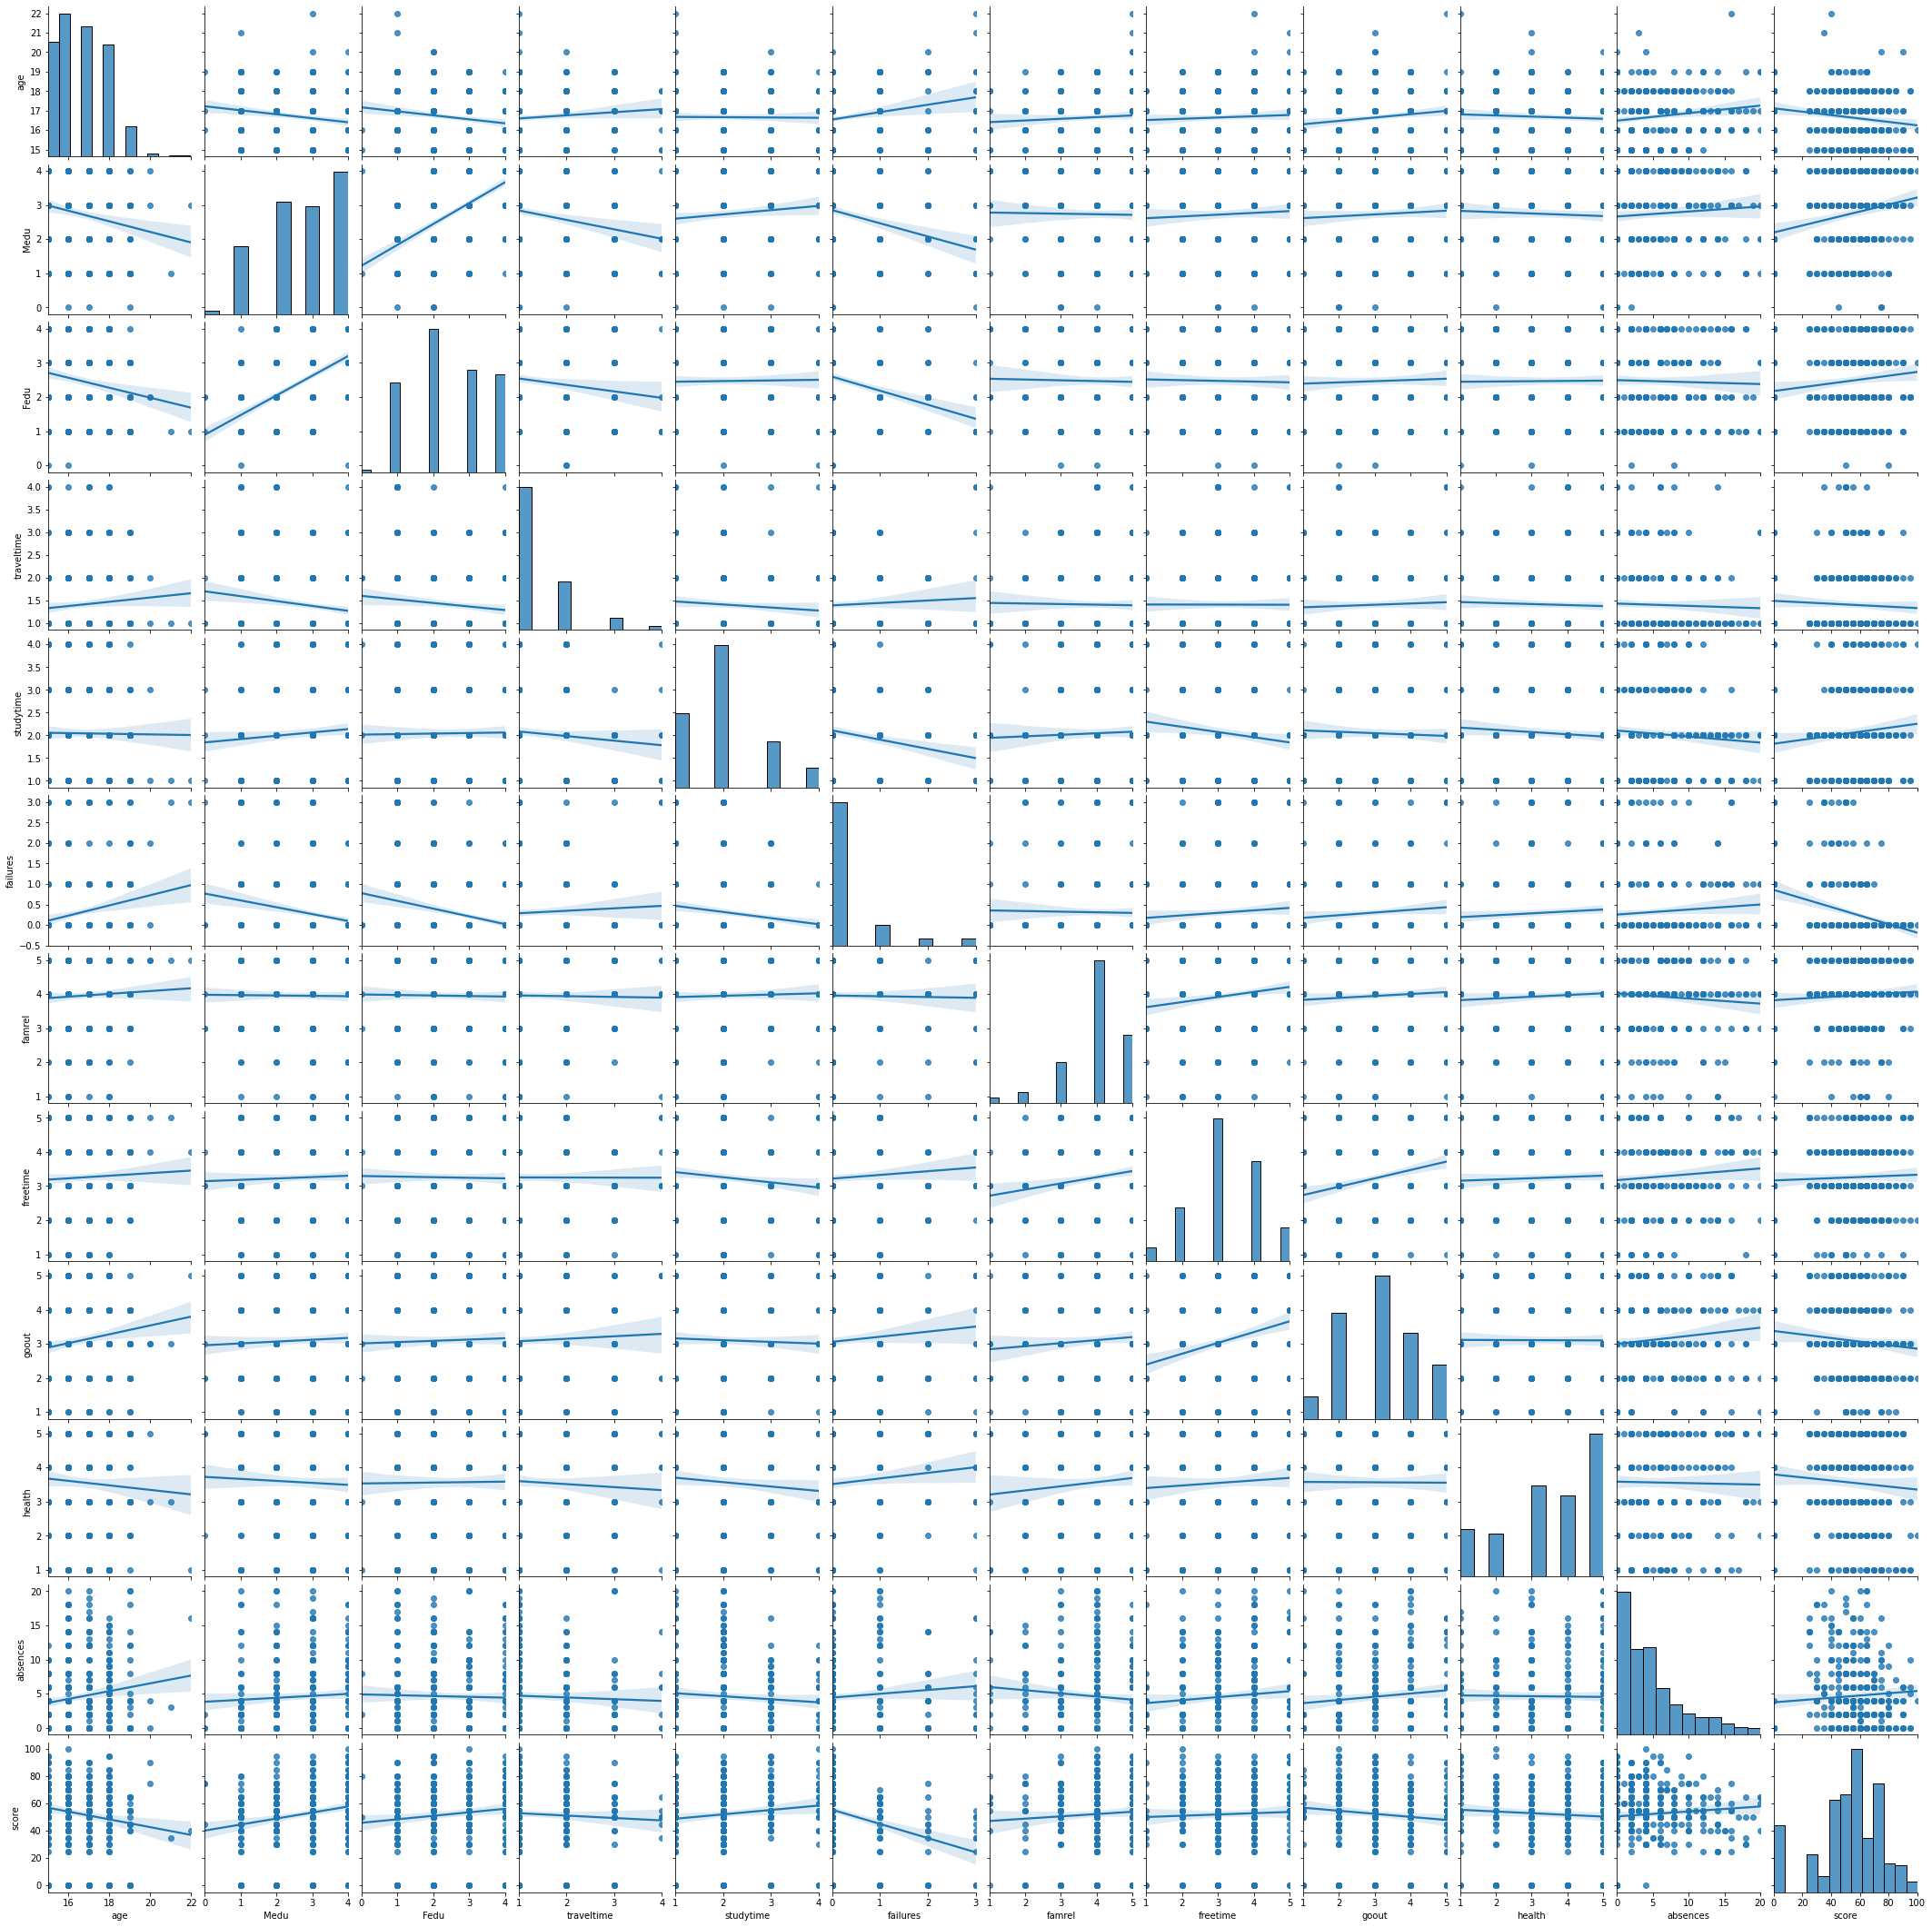

In [191]:
sns.pairplot(math,  kind = 'reg') # графики зависимостей

In [192]:
math.corr() # матрица корреляций

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.178544,-0.173245,0.086832,-0.010651,0.217280,0.059692,0.049611,0.149460,-0.061529,0.148437,-0.157974
Medu,-0.178544,1.000000,0.594081,-0.172479,0.095697,-0.254319,-0.013216,0.045712,0.054035,-0.047271,0.065026,0.212342
Fedu,-0.173245,0.594081,1.000000,-0.121623,0.014803,-0.279051,-0.018591,-0.019159,0.036661,0.010513,-0.026101,0.119849
traveltime,0.086832,-0.172479,-0.121623,1.000000,-0.082046,0.056727,-0.016415,-0.001809,0.045091,-0.044274,-0.035997,-0.052938
studytime,-0.010651,0.095697,0.014803,-0.082046,1.000000,-0.174359,0.035224,-0.130854,-0.039465,-0.079743,-0.076534,0.119012
failures,0.217280,-0.254319,-0.279051,0.056727,-0.174359,1.000000,-0.018472,0.081508,0.098403,0.087649,0.082667,-0.329721
famrel,0.059692,-0.013216,-0.018591,-0.016415,0.035224,-0.018472,1.000000,0.164375,0.071360,0.078062,-0.083344,0.064961
freetime,0.049611,0.045712,-0.019159,-0.001809,-0.130854,0.081508,0.164375,1.000000,0.279047,0.052624,0.086623,0.039375
goout,0.149460,0.054035,0.036661,0.045091,-0.039465,0.098403,0.071360,0.279047,1.000000,-0.004674,0.105943,-0.108130
health,-0.061529,-0.047271,0.010513,-0.044274,-0.079743,0.087649,0.078062,0.052624,-0.004674,1.000000,-0.015549,-0.074418


Исходя из матрицы можно сделать вывод, что наиболее скореллированными показателями для score являются уровень образования родителей и время, которое учащийся тратит на обучение.

In [193]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (10, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

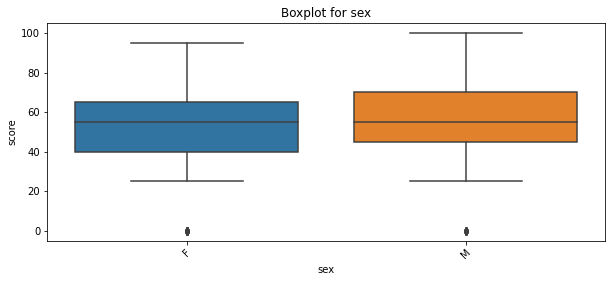

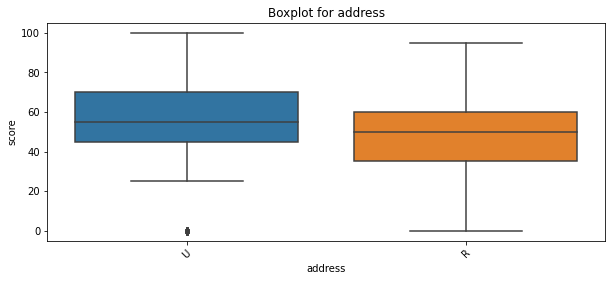

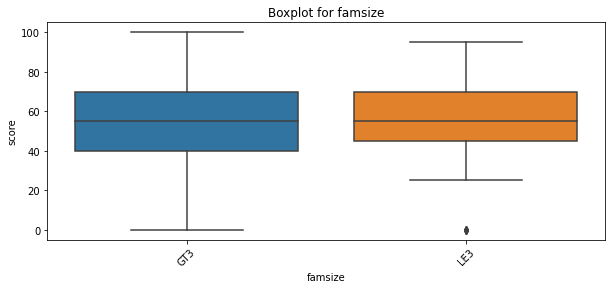

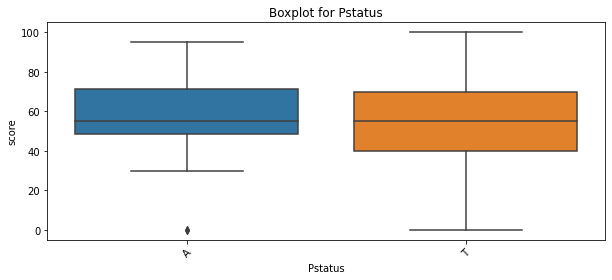

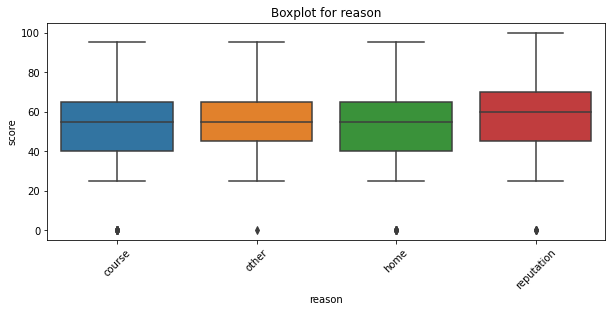

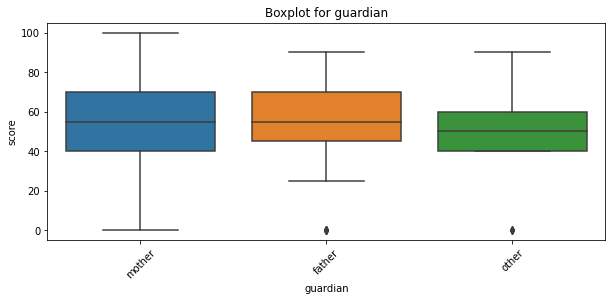

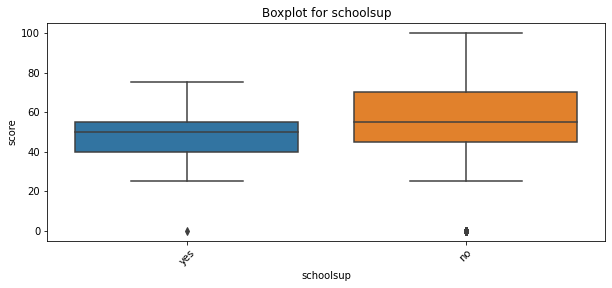

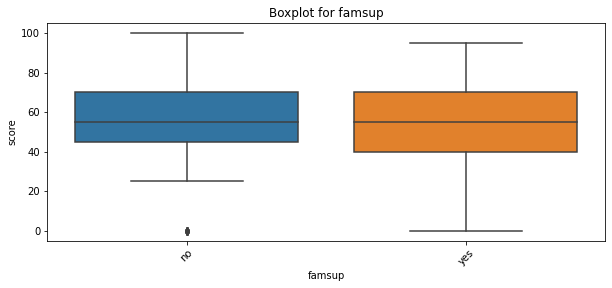

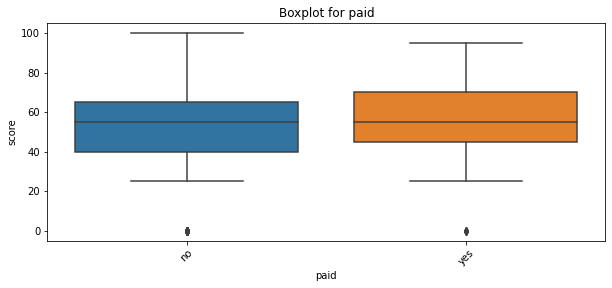

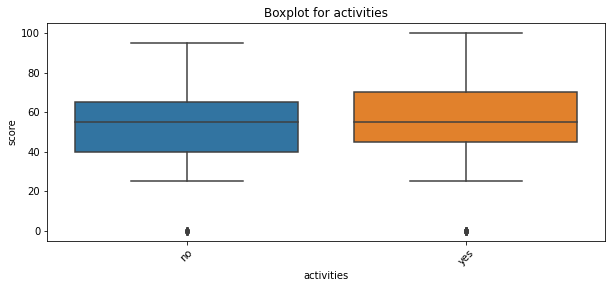

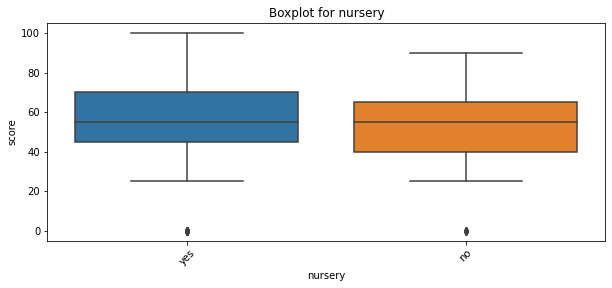

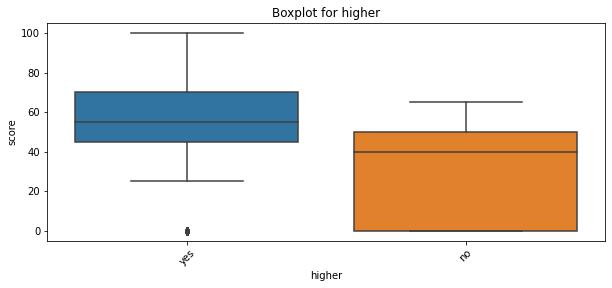

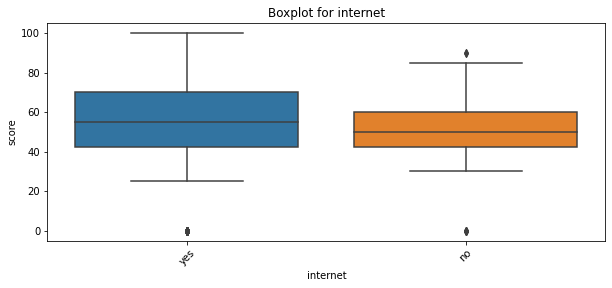

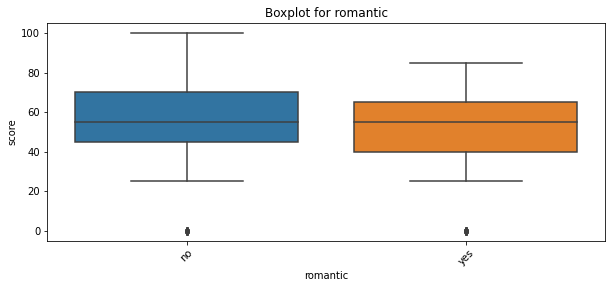

In [194]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [195]:
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [196]:
for col in ['sex', 'address', 'famsize', 'Pstatus', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Переменный, которые, могут оказывать влияние на оценку: sex, address, paid, higher, romantic, Medu, Fedu, studytime

In [197]:
model = math.loc[:, ['sex','address', 'paid', 'higher', 'romantic', 'Medu', 'Fedu', 'studytime']]
model.head()

,sex,address,paid,higher,romantic,Medu,Fedu,studytime
0,F,U,no,yes,no,4.0,4.0,2.0
1,F,U,no,yes,no,1.0,1.0,2.0
2,F,U,no,yes,no,1.0,1.0,2.0
3,F,U,yes,yes,yes,4.0,2.0,3.0
4,F,U,yes,yes,no,3.0,3.0,2.0


Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

!В данных достаточно мало пустых значений.
!Выбросы найдены только в столбцах с пропусками и оценками, что позволяет сделать вывод о том, что данные достаточно чистые.
!Положительная корреляция параметра famrel и score может говорить о том, что хорошие взаимоотношения в семье положительно сказываются на уровень успеваемостиб так же, как и отсуствие пропусков.
!Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company: sex, address, paid, higher, romantic, Medu, Fedu, studytime.